<a class="anchor" id="0"></a>
# Text Mining Mini Project-1
# Author - 2020AIML003 / Sudheendran T L

---
<a class="anchor" id="0.1"></a>
# **Table of Contents**

[Data Preprocessing](#0.2)  

>[Import Libraries](#0.3)  
>[Inspect and Splitting Chapters](#0.4)  


[Term - Frequency Inverse Document Frequency](#1)  
>1  [Remove Stopwords (1 Mark)](#2.1)  
>2  [Remove the punctuations, the special characters and convert the text to lower case.(2 Marks)](#2.2)  
>3  [Create bigrams & trigrams for entire dataset & list down 20 most frequent bigram & 20 trigrams (3 Marks)](#2.3)  
>4  [TF-IDF Algorithm implementation from scratch (3 Marks)](#2.4)  
>5  [Use above algo. & values to calculate TF-IDF & list top 10 words with highest TF-IDF Value. (2 Marks)](#2.5)  


[Perform Part of Speech Tagging using the Viterbi Algorithm](#3)  
>6  [Label the cleaned Tf-IDF dataset (obtained after performing Step 2.1 and Step 2.2 ) (2 Marks)](#3.1)  
>7  [Split the Train and the Test Dataset (1 Mark)](#3.2)  
>8  [Implement the Viterbi Algorithm (you can use Library) to get the Part of Speech Tagging (3 Marks)](#3.3)  
>9  [Calculate the Accuracy and F1 score (2 Marks)](#3.4)  


[Topic Modelling](#4)  
>10  [Using the LDA algorithm create the Topics (10) for the Corpus (3 Marks)](#4.1)  
>11  [List down the 10 words in each of the Topics Extracted(2 Marks)](#4.2)  


[References](#5)

---

## **Data Preprocesing** <a class="anchor" id="0.2"></a>

### **Import Libraries** <a class="anchor" id="0.3"></a>

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string
import sys

from collections import Counter
from math import log
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.util import trigrams

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from tabulate import tabulate
from wordcloud import WordCloud

[Go To Data Pre-Processing Section](#0.2)  
[Go To Top](#0)

### **Inspect and Splitting Chapters** <a class="anchor" id="0.4"></a>

In [2]:
# Let's read the input dataset/text
with open('TF-IDF_dataset', encoding='utf8') as f:
    text = original_text = f.read()

In [3]:
# The given dataset/text has 8 chapters. Each chapter is to be considered as a different document
# For this we split the 8 chapters and keep them separately
CHAPTERS = 8
chapter_names = ['Chapter 1','Chapter 2','Chapter 3','Chapter 4','Chapter 5','chapter 6','Chapter 7','Chapter 8']
chapters = [""] * CHAPTERS
    
for i in range (CHAPTERS-1, -1, -1):
    text, _, chapters[i] = text.partition(chapter_names[i])

In [4]:
# inspect/check the split chapters for correctness
print ( np.array ( ["Chapter " + str(i+1) + " " + chapters[i][:25].lstrip() + "..." for i in range(CHAPTERS)] ) )

['Chapter 1 I am by birth a Geneves...'
 'Chapter 2 We were brought up toge...'
 'Chapter 3 When I had attained the...'
 'Chapter 4 From this day natural p...'
 'Chapter 5 It was on a dreary nigh...'
 'Chapter 6 “You have been ill, ve...'
 'Chapter 7 “You have probably wai...'
 'Chapter 8 We passed a few sad hou...']


In [5]:
# the 8 chapters are in the list called chapters now

[Go To Data Pre-Processing Section](#0.2)  
[Go To Top](#0)

---
## **Term - Frequency Inverse Document Frequency** <a class="anchor" id="2"></a>

### **1. Remove Stopwords (1 Mark)** <a class="anchor" id="2.1"></a>

In [6]:
stop = stopwords.words('english')
stop.extend(['The', 'A'])

In [7]:
def remove_stopwords ( text ):
    return ' '.join([w for w in word_tokenize(text) if ( ( w.lower() not in stop ) and ( w.isalpha() == True )  )]) + ' '

In [8]:
# lets remove the stop words and then inspect the same
for i in range (CHAPTERS): chapters[i] = remove_stopwords(chapters[i])
print ( np.array ( ["Chapter " + str(i+1) + " " + chapters[i][:25].lstrip() + "..." for i in range(CHAPTERS)] ) )

['Chapter 1 birth Genevese family one...'
 'Chapter 2 brought together quite ye...'
 'Chapter 3 attained age seventeen pa...'
 'Chapter 4 day natural philosophy pa...'
 'Chapter 5 dreary night November beh...'
 'Chapter 6 ill ill even constant let...'
 'Chapter 7 probably waited impatient...'
 'Chapter 8 passed sad hours eleven c...']


[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To Top](#0)

### **2. Remove the punctuations, the special characters and convert the text to lower case.(2 Marks)** <a class="anchor" id="2.2"></a>

In [9]:
# in addition to chars in string.punctuation, we see some special characters in the input text like ”, “, ’
# lets add them to the string.punctuation list
string.punctuation = string.punctuation + '”“’'

def remove_punctuations ( text ):
    nopunc = [char for char in text if char not in string.punctuation] # Check characters to see if they are in punctuation
    nopunc = ''.join(nopunc) # Join the characters again to form the string.
    return nopunc

In [10]:
# lets remove the punctuations and special chars and then inspect the same
for i in range (CHAPTERS): chapters[i] = remove_punctuations(chapters[i])
print ( np.array ( ["Chapter " + str(i+1) + " " + chapters[i][:25].lstrip() + "..." for i in range(CHAPTERS)] ) )

['Chapter 1 birth Genevese family one...'
 'Chapter 2 brought together quite ye...'
 'Chapter 3 attained age seventeen pa...'
 'Chapter 4 day natural philosophy pa...'
 'Chapter 5 dreary night November beh...'
 'Chapter 6 ill ill even constant let...'
 'Chapter 7 probably waited impatient...'
 'Chapter 8 passed sad hours eleven c...']


In [11]:
# lets convert all text in all chapters to lower case and inspect the same
for i in range (CHAPTERS): chapters[i] = chapters[i].lower()
print ( np.array ( ["Chapter " + str(i+1) + " " + chapters[i][:25].lstrip() + "..." for i in range(CHAPTERS)] ) )

['Chapter 1 birth genevese family one...'
 'Chapter 2 brought together quite ye...'
 'Chapter 3 attained age seventeen pa...'
 'Chapter 4 day natural philosophy pa...'
 'Chapter 5 dreary night november beh...'
 'Chapter 6 ill ill even constant let...'
 'Chapter 7 probably waited impatient...'
 'Chapter 8 passed sad hours eleven c...']


In [12]:
# Let's store the tokenized chapters too for ready usage later on
tokenized_chapters = [""] * CHAPTERS

for i in range (CHAPTERS): tokenized_chapters[i] = word_tokenize(chapters[i])

# Let's store the complete dataset/text and the tokenized version of it too
text = ' '.join([chapters[i] for i in range(CHAPTERS)])
tokenized_text = word_tokenize(text)

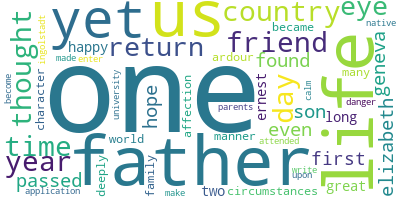

In [13]:
# lets display the word frequency cloud to visualize the most frequent words
WordCloud(background_color="white", max_words=50).generate(text).to_image()

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To Top](#0)

### **3. Create bigrams & trigrams for entire dataset & list down 20 most frequent bigram & trigrams (3 Marks)** <a class="anchor" id="2.3"></a>

In [14]:
# Per instructions, here's a list of bigrams in the ENTIRE DATASET i.e stop words not removed, only punctuations removed...
Counter(list(bigrams(word_tokenize(remove_punctuations(original_text).lower())))).most_common(20)

[(('of', 'the'), 24),
 (('in', 'the'), 13),
 (('of', 'a'), 10),
 (('of', 'my'), 8),
 (('and', 'the'), 7),
 (('on', 'the'), 7),
 (('and', 'my'), 6),
 (('the', 'most'), 6),
 (('with', 'the'), 6),
 (('it', 'was'), 6),
 (('and', 'i'), 6),
 (('by', 'the'), 5),
 (('that', 'he'), 5),
 (('i', 'was'), 5),
 (('to', 'my'), 5),
 (('i', 'had'), 5),
 (('that', 'i'), 5),
 (('to', 'be'), 5),
 (('my', 'father'), 4),
 (('was', 'to'), 4)]

<AxesSubplot:>

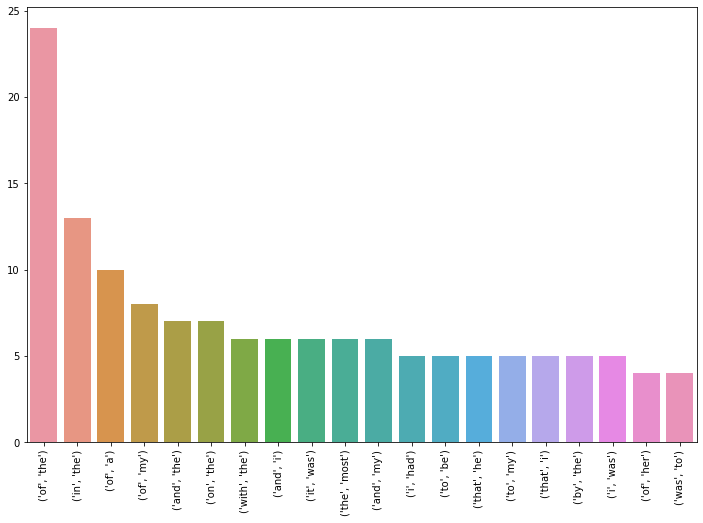

In [15]:
# Let's visually see this; this time we will use pd.Series to calculate the bigrams
bigrams_series = (pd.Series(bigrams(word_tokenize(remove_punctuations(original_text).lower()))).value_counts())[:20]
bigrams_series.sort_values(ascending=False).plot.bar(width=0.75, figsize=(12, 8))
sns.barplot(x=bigrams_series.index, y=bigrams_series)

In [16]:
# Per instructions, here's a list of trigrams in the ENTIRE DATASET i.e stop words not removed, only punctuations removed...
Counter(list(trigrams(word_tokenize(remove_punctuations(original_text).lower())))).most_common(20)

[(('was', 'of', 'a'), 3),
 (('in', 'the', 'most'), 2),
 (('and', 'to', 'enter'), 2),
 (('to', 'enter', 'into'), 2),
 (('the', 'hands', 'of'), 2),
 (('when', 'i', 'had'), 2),
 (('that', 'i', 'should'), 2),
 (('at', 'the', 'university'), 2),
 (('was', 'at', 'first'), 2),
 (('the', 'improvement', 'of'), 2),
 (('thought', 'of', 'returning'), 2),
 (('it', 'was', 'already'), 2),
 (('for', 'a', 'long'), 2),
 (('a', 'long', 'time'), 2),
 (('return', 'to', 'us'), 2),
 (('was', 'to', 'be'), 2),
 (('chapter', '1', 'i'), 1),
 (('1', 'i', 'am'), 1),
 (('i', 'am', 'by'), 1),
 (('am', 'by', 'birth'), 1)]

<AxesSubplot:>

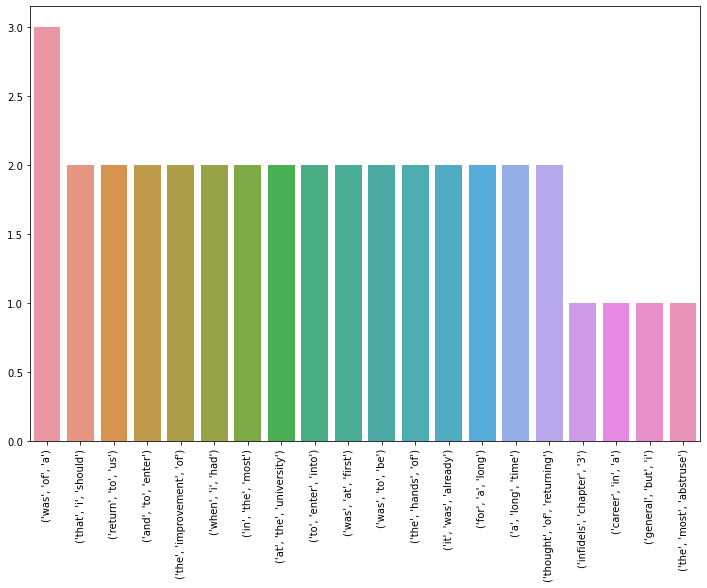

In [17]:
# Let's visually see this; this time we will use pd.Series to calculate the trigrams
trigrams_series = (pd.Series(trigrams(word_tokenize(remove_punctuations(original_text).lower()))).value_counts())[:20]
trigrams_series.sort_values(ascending=False).plot.bar(width=0.75, figsize=(12, 8))
sns.barplot(x=trigrams_series.index, y=trigrams_series)

In [18]:
# Here's a list of the bigrams in the dataset where both stop words and punctuations have been removed
Counter(list(bigrams(word_tokenize(remove_punctuations(text).lower())))).most_common(20)

[(('native', 'country'), 2),
 (('natural', 'philosophy'), 2),
 (('two', 'years'), 2),
 (('thought', 'returning'), 2),
 (('long', 'time'), 2),
 (('return', 'us'), 2),
 (('birth', 'genevese'), 1),
 (('genevese', 'family'), 1),
 (('family', 'one'), 1),
 (('one', 'distinguished'), 1),
 (('distinguished', 'republic'), 1),
 (('republic', 'ancestors'), 1),
 (('ancestors', 'many'), 1),
 (('many', 'years'), 1),
 (('years', 'counsellors'), 1),
 (('counsellors', 'syndics'), 1),
 (('syndics', 'father'), 1),
 (('father', 'filled'), 1),
 (('filled', 'several'), 1),
 (('several', 'public'), 1)]

<AxesSubplot:>

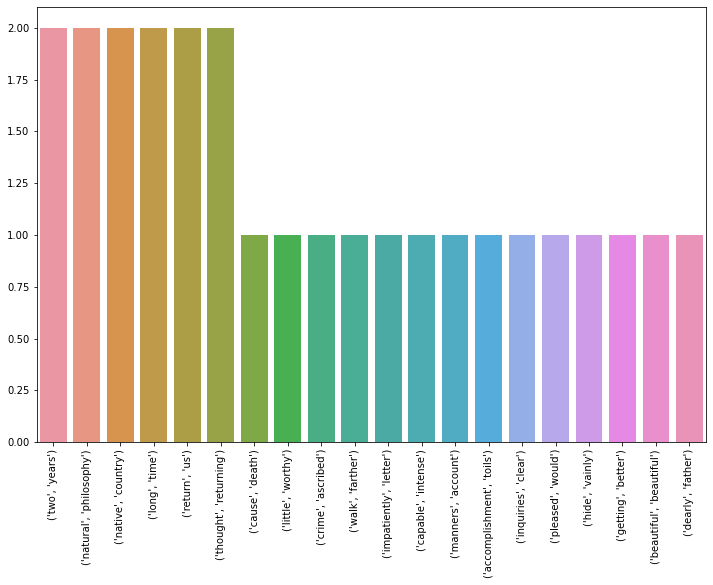

In [19]:
# Let's visually see this; this time we will use pd.Series to calculate the bigrams
bigrams_series = (pd.Series(bigrams(word_tokenize(remove_punctuations(text).lower()))).value_counts())[:20]
bigrams_series.sort_values(ascending=False).plot.bar(width=0.75, figsize=(12, 8))
sns.barplot(x=bigrams_series.index, y=bigrams_series)

In [20]:
# Here's a list of the trigrams in the dataset where both stop words and punctuations have been removed
Counter(list(trigrams(word_tokenize(remove_punctuations(text).lower())))).most_common(20)

[(('birth', 'genevese', 'family'), 1),
 (('genevese', 'family', 'one'), 1),
 (('family', 'one', 'distinguished'), 1),
 (('one', 'distinguished', 'republic'), 1),
 (('distinguished', 'republic', 'ancestors'), 1),
 (('republic', 'ancestors', 'many'), 1),
 (('ancestors', 'many', 'years'), 1),
 (('many', 'years', 'counsellors'), 1),
 (('years', 'counsellors', 'syndics'), 1),
 (('counsellors', 'syndics', 'father'), 1),
 (('syndics', 'father', 'filled'), 1),
 (('father', 'filled', 'several'), 1),
 (('filled', 'several', 'public'), 1),
 (('several', 'public', 'situations'), 1),
 (('public', 'situations', 'honour'), 1),
 (('situations', 'honour', 'reputation'), 1),
 (('honour', 'reputation', 'respected'), 1),
 (('reputation', 'respected', 'knew'), 1),
 (('respected', 'knew', 'integrity'), 1),
 (('knew', 'integrity', 'indefatigable'), 1)]

<AxesSubplot:>

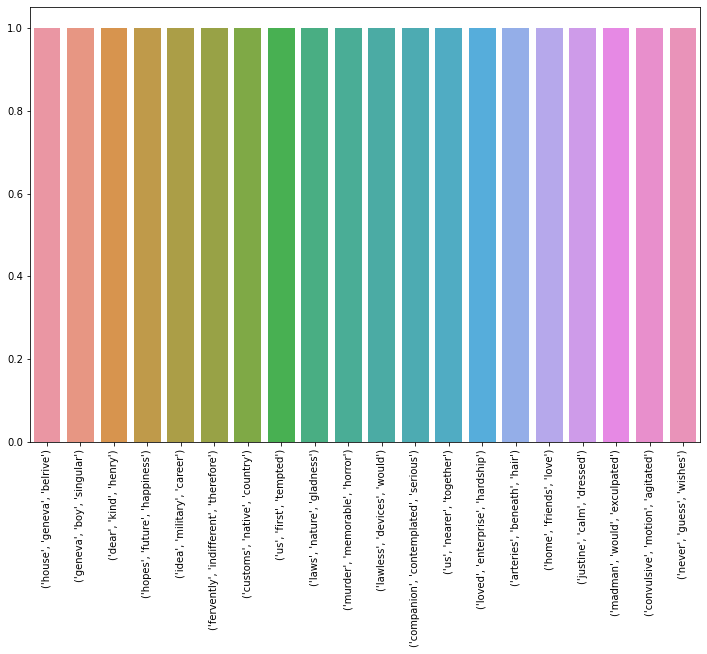

In [21]:
# Let's visually see this; this time we will use pd.Series to calculate the trigrams
trigrams_series = (pd.Series(trigrams(word_tokenize(remove_punctuations(text).lower()))).value_counts())[:20]
trigrams_series.sort_values(ascending=False).plot.bar(width=0.75, figsize=(12, 8))
sns.barplot(x=trigrams_series.index, y=trigrams_series)

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To Top](#0)

### **4. TF-IDF Algorithm implementation from scratch (3 Marks)** <a class="anchor" id="2.4"></a>

In [22]:
def getTFIDFVector (corpus, doc_names, docs):

    try:

        # initialize the list called tf_idf_vector which will be returned by this function
        tf_idf_vector=[]

        # convert the entire corpus to lower case
        corpus = corpus.lower()

        # tokenize and store the corpus
        tokenized_corpus = word_tokenize(corpus)

        # calculate total docs in corpus
        total_docs_in_corpus = len(doc_names)

        # calculate total words in corpus
        total_words_in_corpus = len(tokenized_corpus)
        
        # Lets create a list of unique words and the # of times they occur
        # in the corpus as a tuple
        tf1 = sorted(Counter(tokenized_corpus).items(), key=lambda pair: pair[0])
        total_unique_words_in_corpus = len(tf1)

        # lets build a unique list of words in the entire corpus
        word_list = []
        for word_id in range (0, total_unique_words_in_corpus):
            word_list.append(tf1[word_id][0])

        # lets build a dataframe that will contain all unique words as columns
        # One row per document will be there in this dataframe, containing the TF
        df = pd.DataFrame(0.0, columns=word_list, index=doc_names)

        # initialize the entire dataframe to zeros
        for doc_id in range (0, total_docs_in_corpus):
            for word_id in range (0, total_unique_words_in_corpus ):
                df.at[doc_names[doc_id], word_list[word_id]] = 0.0;

        for doc_id in range (0, total_docs_in_corpus):
            tokenized_doc = word_tokenize(docs[doc_id].lower())
            total_words_in_doc = len(tokenized_doc)
            tf2 = sorted(Counter(tokenized_doc).items(), key=lambda pair: pair[0])
            total_unique_words_in_doc = len(tf2)

            # calculate and update Term Freqeuncy of all words (columns)
            # tf(t,d) = count of t in d / number of words in d
            for word_id in range (0, total_unique_words_in_doc):
                df.at[doc_names[doc_id], tf2[word_id][0]] = tf2[word_id][1] / total_words_in_doc

        # next calculate and update Inverse Document Freqeuncy of all words (columns)
        # we also smooth out the idf values, to avoid term become completely 0
        # idf(t) = 1 + log(N/ 1 + df(t))
        # finally we calculate and store TF*IDF 
        for doc_id in range (0, total_docs_in_corpus):
            for word_id in range (0, total_unique_words_in_corpus):
                idf = 1 + ( log( total_docs_in_corpus / ( ( df[tf1[word_id][0]] > 0 ).sum() + 1 ) ) )
                tf_idf_vector.append( ( tf1[word_id][0], ( df.at[doc_names[doc_id], tf1[word_id][0]] * idf  ) ) )
                
    except:
        # in case of runtime exceptions we will detect it here gracefully
        print("Oops!", sys.exc_info()[0], "occurred.")
        print()

    else:
        print("TF-IDF Vector successfully constructed!")
        
    finally:
        return tf_idf_vector

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To Top](#0)

### **5. Use above algo. & values to calculate TF-IDF & list top 10 words with highest TF-IDF Value. (2 Marks)** <a class="anchor" id="2.5"></a>

In [23]:
# lets invoke our customer method to get the TF-IDF vector
tf_idf_vector = getTFIDFVector(text, chapter_names, chapters)

TF-IDF Vector successfully constructed!


In [24]:
# lets display the top 10 words with the highest TF-IDF values
sorted(tf_idf_vector, key=lambda pair: pair[1], reverse=True)[0:10]

[('circumstances', 0.060158681372770355),
 ('return', 0.05502303480588128),
 ('almost', 0.050772220449359376),
 ('black', 0.050772220449359376),
 ('limbs', 0.050772220449359376),
 ('yellow', 0.050772220449359376),
 ('justine', 0.04648625378804982),
 ('waited', 0.044190636317035015),
 ('walk', 0.044190636317035015),
 ('william', 0.044190636317035015)]

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To Top](#0)

---
## **Perform Part of Speech Tagging using the Viterbi Algorithm** <a class="anchor" id="3"></a>

### **6. Label the cleaned TF-IDF dataset (obtained after performing Step 1 and Step 2 ) (2 Marks)** <a class="anchor" id="3.1"></a>

In [25]:
# Lets label the dataset (i.e. words tagged with their respective Parts of Speech (POS))
tagged_chapters = [""] * CHAPTERS
word_count = 0
for i in range (CHAPTERS):
    tagged_chapters[i] = nltk.pos_tag(tokenized_chapters[i])
    word_count = word_count + len(tagged_chapters[i])

In [26]:
tagged_chapters_ = []
for s in tagged_chapters:
    s.insert(0,('##','##'))
    s.append(('&&','&&'))
    tagged_chapters_.append(s)

In [27]:
# Lets display the tagged words
tagged_chapters_

[[('##', '##'),
  ('birth', 'NN'),
  ('genevese', 'JJ'),
  ('family', 'NN'),
  ('one', 'CD'),
  ('distinguished', 'VBN'),
  ('republic', 'JJ'),
  ('ancestors', 'NNS'),
  ('many', 'JJ'),
  ('years', 'NNS'),
  ('counsellors', 'NNS'),
  ('syndics', 'VBP'),
  ('father', 'RB'),
  ('filled', 'VBN'),
  ('several', 'JJ'),
  ('public', 'JJ'),
  ('situations', 'NNS'),
  ('honour', 'VBP'),
  ('reputation', 'NN'),
  ('respected', 'VBD'),
  ('knew', 'JJ'),
  ('integrity', 'NN'),
  ('indefatigable', 'JJ'),
  ('attention', 'NN'),
  ('public', 'NN'),
  ('business', 'NN'),
  ('passed', 'VBD'),
  ('younger', 'JJR'),
  ('days', 'NNS'),
  ('perpetually', 'RB'),
  ('occupied', 'JJ'),
  ('affairs', 'NNS'),
  ('country', 'NN'),
  ('variety', 'NN'),
  ('circumstances', 'NNS'),
  ('prevented', 'VBD'),
  ('marrying', 'VBG'),
  ('early', 'JJ'),
  ('decline', 'JJ'),
  ('life', 'NN'),
  ('became', 'VBD'),
  ('husband', 'NN'),
  ('father', 'NN'),
  ('family', 'NN'),
  ('circumstances', 'NNS'),
  ('marriage', 'NN'),

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Top](#0)

### **7. Split the Train and the Test Dataset (1 Mark)** <a class="anchor" id="3.2"></a>

In [28]:
# Let's split 80% of data for training and 20% of the data for testing
i = int(len(tagged_chapters_) * 0.8)
test_data = tagged_chapters_[i:]
train_data = tagged_chapters_[:i]

In [29]:
train_data

[[('##', '##'),
  ('birth', 'NN'),
  ('genevese', 'JJ'),
  ('family', 'NN'),
  ('one', 'CD'),
  ('distinguished', 'VBN'),
  ('republic', 'JJ'),
  ('ancestors', 'NNS'),
  ('many', 'JJ'),
  ('years', 'NNS'),
  ('counsellors', 'NNS'),
  ('syndics', 'VBP'),
  ('father', 'RB'),
  ('filled', 'VBN'),
  ('several', 'JJ'),
  ('public', 'JJ'),
  ('situations', 'NNS'),
  ('honour', 'VBP'),
  ('reputation', 'NN'),
  ('respected', 'VBD'),
  ('knew', 'JJ'),
  ('integrity', 'NN'),
  ('indefatigable', 'JJ'),
  ('attention', 'NN'),
  ('public', 'NN'),
  ('business', 'NN'),
  ('passed', 'VBD'),
  ('younger', 'JJR'),
  ('days', 'NNS'),
  ('perpetually', 'RB'),
  ('occupied', 'JJ'),
  ('affairs', 'NNS'),
  ('country', 'NN'),
  ('variety', 'NN'),
  ('circumstances', 'NNS'),
  ('prevented', 'VBD'),
  ('marrying', 'VBG'),
  ('early', 'JJ'),
  ('decline', 'JJ'),
  ('life', 'NN'),
  ('became', 'VBD'),
  ('husband', 'NN'),
  ('father', 'NN'),
  ('family', 'NN'),
  ('circumstances', 'NNS'),
  ('marriage', 'NN'),

In [30]:
test_data

[[('##', '##'),
  ('probably', 'RB'),
  ('waited', 'VBD'),
  ('impatiently', 'RB'),
  ('letter', 'NN'),
  ('fix', 'NN'),
  ('date', 'NN'),
  ('return', 'VB'),
  ('us', 'PRP'),
  ('first', 'RB'),
  ('tempted', 'VBD'),
  ('write', 'JJ'),
  ('lines', 'NNS'),
  ('merely', 'RB'),
  ('mentioning', 'VBG'),
  ('day', 'NN'),
  ('expect', 'VB'),
  ('would', 'MD'),
  ('cruel', 'VB'),
  ('kindness', 'NN'),
  ('dare', 'NN'),
  ('would', 'MD'),
  ('surprise', 'VB'),
  ('son', 'NN'),
  ('expected', 'VBN'),
  ('happy', 'JJ'),
  ('glad', 'JJ'),
  ('welcome', 'NN'),
  ('behold', 'VBD'),
  ('contrary', 'JJ'),
  ('tears', 'NNS'),
  ('wretchedness', 'JJ'),
  ('victor', 'NN'),
  ('relate', 'NN'),
  ('misfortune', 'NN'),
  ('absence', 'NN'),
  ('rendered', 'VBD'),
  ('callous', 'JJ'),
  ('joys', 'NNS'),
  ('griefs', 'VBP'),
  ('shall', 'MD'),
  ('inflict', 'VB'),
  ('pain', 'NN'),
  ('long', 'JJ'),
  ('absent', 'NN'),
  ('son', 'NN'),
  ('wish', 'JJ'),
  ('prepare', 'NN'),
  ('woeful', 'JJ'),
  ('news', 'NN'

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Top](#0)

### **8. Implement the Viterbi Algorithm (you can use Library) to get the Part of Speech Tagging (3 Marks)** <a class="anchor" id="3.3"></a>

In [31]:
# Build the dictionary of the words in the training list

train_word_tag = {}
for s in train_data:
    for (w,t) in s:
        w=w.lower()
        try:
            try:
                train_word_tag[t][w]+=1
            except:
                train_word_tag[t][w]=1
        except:
            train_word_tag[t]={w:1}
            
train_word_tag

{'##': {'##': 6},
 'NN': {'birth': 1,
  'family': 2,
  'reputation': 1,
  'integrity': 1,
  'attention': 1,
  'public': 1,
  'business': 1,
  'country': 5,
  'variety': 1,
  'life': 6,
  'husband': 1,
  'father': 3,
  'marriage': 1,
  'character': 1,
  'refrain': 2,
  'intimate': 1,
  'state': 1,
  'man': 1,
  'name': 1,
  'beaufort': 2,
  'proud': 1,
  'disposition': 2,
  'poverty': 1,
  'oblivion': 1,
  'magnificence': 1,
  'manner': 2,
  'town': 2,
  'lucerne': 1,
  'wretchedness': 1,
  'friendship': 2,
  'retreat': 1,
  'pride': 1,
  'conduct': 1,
  'affection': 2,
  'time': 3,
  'hope': 1,
  'world': 3,
  'credit': 1,
  'assistance': 1,
  'year': 1,
  'difference': 1,
  'dispute': 1,
  'harmony': 1,
  'soul': 2,
  'companionship': 1,
  'diversity': 1,
  'contrast': 2,
  'calmer': 1,
  'ardour': 2,
  'application': 2,
  'knowledge': 2,
  'home': 2,
  'sublime': 1,
  'silence': 1,
  'winter': 1,
  'turbulence': 1,
  'alpine': 1,
  'scope': 1,
  'admiration': 2,
  'companion': 1,
  '

In [32]:
# Calculating the emission probabilities using train_word_tag
train_emission_prob={}
for k in train_word_tag.keys():
    train_emission_prob[k]={}
    count = sum(train_word_tag[k].values())
    for k2 in train_word_tag[k].keys():
        train_emission_prob[k][k2]=train_word_tag[k][k2]/count
        
train_emission_prob

{'##': {'##': 1.0},
 'NN': {'birth': 0.0034129692832764505,
  'family': 0.006825938566552901,
  'reputation': 0.0034129692832764505,
  'integrity': 0.0034129692832764505,
  'attention': 0.0034129692832764505,
  'public': 0.0034129692832764505,
  'business': 0.0034129692832764505,
  'country': 0.017064846416382253,
  'variety': 0.0034129692832764505,
  'life': 0.020477815699658702,
  'husband': 0.0034129692832764505,
  'father': 0.010238907849829351,
  'marriage': 0.0034129692832764505,
  'character': 0.0034129692832764505,
  'refrain': 0.006825938566552901,
  'intimate': 0.0034129692832764505,
  'state': 0.0034129692832764505,
  'man': 0.0034129692832764505,
  'name': 0.0034129692832764505,
  'beaufort': 0.006825938566552901,
  'proud': 0.0034129692832764505,
  'disposition': 0.006825938566552901,
  'poverty': 0.0034129692832764505,
  'oblivion': 0.0034129692832764505,
  'magnificence': 0.0034129692832764505,
  'manner': 0.006825938566552901,
  'town': 0.006825938566552901,
  'lucerne'

In [33]:
# Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:

    bi=list(nltk.bigrams(s))
    
    for b1,b2 in bi:
        try:
            try:
                bigram_tag_data[b1[1]][b2[1]]+=1
            except:
                bigram_tag_data[b1[1]][b2[1]]=1
        except:
            bigram_tag_data[b1[1]]={b2[1]:1}

bigram_tag_data

{'##': {'NN': 3, 'VBN': 2, 'JJ': 1},
 'NN': {'JJ': 36,
  'CD': 3,
  'VBD': 48,
  'NN': 106,
  'NNS': 22,
  'VBP': 6,
  'VBG': 6,
  'WP$': 1,
  'MD': 4,
  'RB': 25,
  'JJS': 6,
  '&&': 3,
  'VBN': 16,
  'VBZ': 2,
  'IN': 4,
  'JJR': 1,
  'VB': 2,
  'RBR': 1,
  'NNP': 1},
 'JJ': {'NN': 106,
  'NNS': 30,
  'JJ': 33,
  'CD': 3,
  'VBZ': 1,
  'RB': 2,
  'VBN': 5,
  'JJS': 1,
  'VBG': 1,
  'PRP': 1},
 'CD': {'VBN': 1, 'NN': 5, 'NNS': 3, 'IN': 1},
 'VBN': {'JJ': 15,
  'RB': 7,
  'NN': 9,
  'VBP': 1,
  'NNS': 6,
  'VBG': 1,
  'DT': 1,
  'IN': 1},
 'NNS': {'JJ': 13,
  'NNS': 10,
  'VBP': 22,
  'RB': 10,
  'NN': 12,
  'VBD': 21,
  'JJS': 1,
  'VBN': 8,
  '&&': 2,
  'FW': 1,
  'VBZ': 1,
  'VBG': 2,
  'VB': 1,
  'PRP': 1},
 'VBP': {'RB': 6,
  'NN': 8,
  'VBG': 2,
  'VBP': 1,
  'NNS': 3,
  'JJ': 10,
  'PRP': 1,
  'RBR': 1,
  'VBN': 1,
  'VBZ': 1},
 'RB': {'VBN': 5,
  'JJ': 25,
  'VBD': 12,
  'RB': 3,
  'NN': 4,
  'VB': 5,
  'VBG': 4,
  'RBR': 1,
  'VBZ': 2,
  'MD': 4,
  'NNS': 4,
  'CD': 2,
  'VBP'

In [34]:
# Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
    bigram_tag_prob[k]={}
    count=sum(bigram_tag_data[k].values())
    for k2 in bigram_tag_data[k].keys():
        bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

bigram_tag_prob

{'##': {'NN': 0.5, 'VBN': 0.3333333333333333, 'JJ': 0.16666666666666666},
 'NN': {'JJ': 0.12286689419795221,
  'CD': 0.010238907849829351,
  'VBD': 0.16382252559726962,
  'NN': 0.36177474402730375,
  'NNS': 0.07508532423208192,
  'VBP': 0.020477815699658702,
  'VBG': 0.020477815699658702,
  'WP$': 0.0034129692832764505,
  'MD': 0.013651877133105802,
  'RB': 0.08532423208191127,
  'JJS': 0.020477815699658702,
  '&&': 0.010238907849829351,
  'VBN': 0.05460750853242321,
  'VBZ': 0.006825938566552901,
  'IN': 0.013651877133105802,
  'JJR': 0.0034129692832764505,
  'VB': 0.006825938566552901,
  'RBR': 0.0034129692832764505,
  'NNP': 0.0034129692832764505},
 'JJ': {'NN': 0.5792349726775956,
  'NNS': 0.16393442622950818,
  'JJ': 0.18032786885245902,
  'CD': 0.01639344262295082,
  'VBZ': 0.00546448087431694,
  'RB': 0.01092896174863388,
  'VBN': 0.0273224043715847,
  'JJS': 0.00546448087431694,
  'VBG': 0.00546448087431694,
  'PRP': 0.00546448087431694},
 'CD': {'VBN': 0.1, 'NN': 0.5, 'NNS': 0

In [35]:
# Calculating the possible tags for each word
# Note: Here we have used the whole data(Train+Test)
# Reason: There may be some words which are not present in train data but are present in test data 

tags_of_tokens = {}
count=0
for s in train_data:
    for (w,t) in s:
        w=w.lower()

        try:
            if t not in tags_of_tokens[w]:
                tags_of_tokens[w].append(t)
        except:
            l = []
            l.append(t)
            tags_of_tokens[w] = l
            
    for s in test_data:
        for (w,t) in s:
            w=w.lower()

            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l

tags_of_tokens

{'##': ['##'],
 'birth': ['NN', 'JJ'],
 'genevese': ['JJ'],
 'family': ['NN'],
 'one': ['CD'],
 'distinguished': ['VBN', 'VBD'],
 'republic': ['JJ'],
 'ancestors': ['NNS'],
 'many': ['JJ'],
 'years': ['NNS'],
 'counsellors': ['NNS'],
 'syndics': ['VBP'],
 'father': ['RB', 'NN'],
 'filled': ['VBN'],
 'several': ['JJ'],
 'public': ['JJ', 'NN'],
 'situations': ['NNS'],
 'honour': ['VBP'],
 'reputation': ['NN'],
 'respected': ['VBD'],
 'knew': ['JJ'],
 'integrity': ['NN'],
 'indefatigable': ['JJ'],
 'attention': ['NN'],
 'business': ['NN'],
 'passed': ['VBD', 'VBN'],
 'younger': ['JJR'],
 'days': ['NNS'],
 'perpetually': ['RB'],
 'occupied': ['JJ'],
 'affairs': ['NNS'],
 'country': ['NN'],
 'variety': ['NN'],
 'circumstances': ['NNS'],
 'prevented': ['VBD'],
 'marrying': ['VBG'],
 'early': ['JJ'],
 'decline': ['JJ'],
 'life': ['NN'],
 'became': ['VBD'],
 'husband': ['NN'],
 'marriage': ['NN'],
 'illustrate': ['VBP'],
 'character': ['NN'],
 'refrain': ['NN'],
 'relating': ['VBG'],
 'intimat

In [36]:
# Dividing the test data into test words and test tags

test_words=[]
test_tags=[]

for s in test_data:
    temp_word=[]
    temp_tag=[]
    for (w,t) in s:
        temp_word.append(w.lower())
        temp_tag.append(t)
    test_words.append(temp_word)
    test_tags.append(temp_tag)

test_words
test_tags

[['##',
  'RB',
  'VBD',
  'RB',
  'NN',
  'NN',
  'NN',
  'VB',
  'PRP',
  'RB',
  'VBD',
  'JJ',
  'NNS',
  'RB',
  'VBG',
  'NN',
  'VB',
  'MD',
  'VB',
  'NN',
  'NN',
  'MD',
  'VB',
  'NN',
  'VBN',
  'JJ',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'JJ',
  'NN',
  'NN',
  'NN',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'VBP',
  'MD',
  'VB',
  'NN',
  'JJ',
  'NN',
  'NN',
  'JJ',
  'NN',
  'JJ',
  'NN',
  'VBP',
  'JJ',
  'RB',
  'NN',
  'NNS',
  'VBP',
  'JJ',
  'NNS',
  'VBP',
  'JJ',
  'NNS',
  'JJ',
  'NN',
  'MD',
  'VB',
  'CD',
  'NNS',
  'VBD',
  'NN',
  'NN',
  'VBG',
  'JJ',
  'NN',
  'VBD',
  'NN',
  'RB',
  'JJ',
  'RB',
  'VB',
  'RP',
  'VBG',
  'VBN',
  'JJ',
  'JJS',
  'VBN',
  'RB',
  'RB',
  'JJ',
  'NN',
  'NN',
  'RB',
  'JJS',
  'VBD',
  'VBN',
  'VBN',
  'NN',
  'VBD',
  'VBG',
  'NN',
  'VB',
  'RB',
  'JJ',
  'RB',
  'VBD',
  'NNS',
  'VBD',
  'JJ',
  'NN',
  'NN',
  '&&'],
 ['##',
  'VBN',
  'JJ',
  'NNS',
  'RB',
  'VBP',
  'NN',
  'NN',
  'NN',
  'NN',
  

In [37]:
# Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
    s = test_words[x]
    #storing_values is a dictionary which stores the required values
    #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
    storing_values = {}
    
    for q in range(len(s)):
        step = s[q]
        #for the starting word of the sentence
        if q == 1:
            storing_values[q] = {}
            tags = tags_of_tokens[step]
            for t in tags:
                #this is applied since we do not know whether the word in the test data is present in train data or not
                try:
                    storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
                #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
                except:
                    storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
        #if the word is not at the start of the sentence
        if q>1:
            storing_values[q] = {}
            previous_states = list(storing_values[q-1].keys())   # loading the previous states
            current_states  = tags_of_tokens[step]               # loading the current states
            #calculation of the best previous state for each current state and then storing
            #it in storing_values
            for t in current_states:
                temp = []
                for pt in previous_states:
                    try:
                        temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
                    except:
                        temp.append(storing_values[q-1][pt][1]*0.0001)
                max_temp_index = temp.index(max(temp))
                best_pt = previous_states[max_temp_index]
                storing_values[q][t]=[best_pt,max(temp)]

    #Backtracing to extract the best possible tags for the sentence
    pred_tags = []
    total_steps_num = storing_values.keys()
    last_step_num = max(total_steps_num)
    for bs in range(len(total_steps_num)):
        step_num = last_step_num - bs
        if step_num == last_step_num:
            pred_tags.append('&&')
            pred_tags.append(storing_values[step_num]['&&'][0])
        if step_num<last_step_num and step_num>0:
            pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
    predicted_tags.append(list(reversed(pred_tags)))
    
predicted_tags

[['##',
  'RB',
  'VBD',
  'RB',
  'NN',
  'NN',
  'NN',
  'JJ',
  'PRP',
  'RB',
  'VBD',
  'RB',
  'NNS',
  'RB',
  'VBG',
  'NN',
  'VB',
  'MD',
  'VB',
  'NN',
  'NN',
  'MD',
  'VB',
  'NN',
  'VBN',
  'JJ',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'NN',
  'NN',
  'NN',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'VBP',
  'MD',
  'VB',
  'NN',
  'JJ',
  'NN',
  'NN',
  'JJ',
  'NN',
  'JJ',
  'NN',
  'VBP',
  'JJ',
  'RB',
  'NN',
  'NNS',
  'VBP',
  'JJ',
  'NNS',
  'VBP',
  'JJ',
  'NNS',
  'JJ',
  'NN',
  'MD',
  'VB',
  'CD',
  'NNS',
  'VBD',
  'NN',
  'NN',
  'VBG',
  'JJ',
  'NN',
  'VBD',
  'NN',
  'RB',
  'JJ',
  'RB',
  'VB',
  'RP',
  'VBG',
  'VBN',
  'NN',
  'JJS',
  'VBN',
  'RB',
  'RB',
  'JJ',
  'NN',
  'VB',
  'RB',
  'JJS',
  'VBD',
  'VBN',
  'VBN',
  'NN',
  'VBD',
  'VBG',
  'JJ',
  'VB',
  'RB',
  'JJ',
  'RB',
  'VBD',
  'NNS',
  'VBD',
  'JJ',
  'NN',
  'VB',
  '&&'],
 ['##',
  'VBD',
  'JJ',
  'NNS',
  'RB',
  'VBP',
  'NN',
  'NN',
  'NN',
  'NN',
  

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Top](#0)

### **9. Calculate the Accuracy and F1 score (2 Marks)** <a class="anchor" id="3.4"></a>

In [38]:
# Let's calculate the accuracy of the tagging done by the Viterbi algorithm, comparing it against the ground truth
right = len([ 1 for i in range(len(test_tags)) for j in range (len(test_tags[i])) if (test_tags[i][j]==predicted_tags[i][j])])
wrong = len([ 1 for i in range(len(test_tags)) for j in range (len(test_tags[i])) if (test_tags[i][j]!=predicted_tags[i][j])])
print(f"Accuracy on the test data is: {(right/(right+wrong)) :.2%}")
print(f"Loss on the test data is: {(wrong/(right+wrong)) :.2%}")

Accuracy on the test data is: 93.61%
Loss on the test data is: 6.39%


In [39]:
# lets calculate the F1 score now
test = [ x for i in range(len(test_tags)) for x in test_tags[i] ]
pred = [ x for i in range(len(predicted_tags)) for x in predicted_tags[i]  ]
print(f"F1 score is: {f1_score(test, pred, average='weighted'):.2%}")

F1 score is: 93.58%


In [40]:
# display accuracy score, classification report and confusion matrix
print(accuracy_score(test, pred))
print(classification_report(test,pred))
print(confusion_matrix(test, pred))

0.9360902255639098
              precision    recall  f1-score   support

          ##       1.00      1.00      1.00         2
          &&       1.00      1.00      1.00         2
          CC       1.00      1.00      1.00         2
          CD       1.00      0.75      0.86         4
          DT       1.00      1.00      1.00         1
          IN       1.00      1.00      1.00         2
          JJ       0.90      0.84      0.87        45
         JJS       1.00      1.00      1.00         2
          MD       1.00      1.00      1.00        10
          NN       0.95      0.94      0.94        77
         NNS       1.00      1.00      1.00        20
         PRP       1.00      1.00      1.00         2
          RB       0.96      1.00      0.98        25
          RP       1.00      1.00      1.00         1
          VB       0.85      0.92      0.88        12
         VBD       0.86      0.96      0.91        26
         VBG       1.00      1.00      1.00         7
        

<AxesSubplot:>

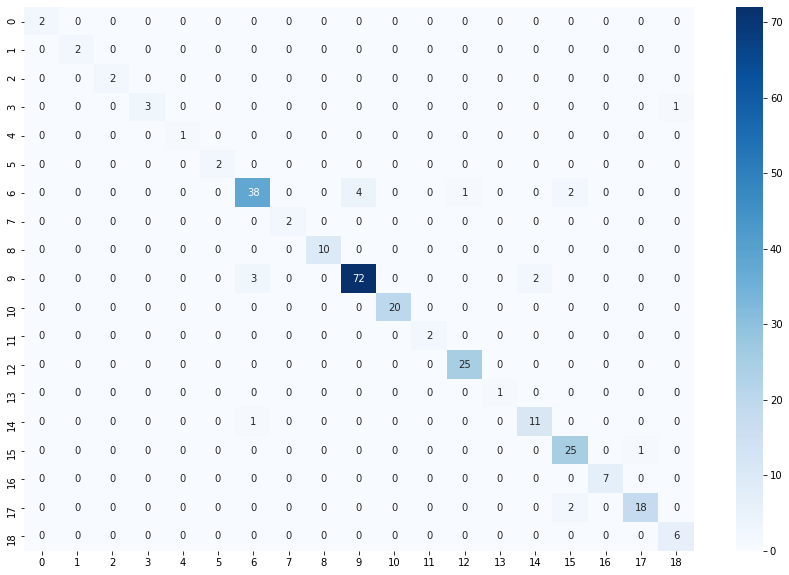

In [41]:
cf_matrix = confusion_matrix(test, pred)
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Top](#0)

---
## **Topic Modelling** <a class="anchor" id="4"></a>

### **10. Using the LDA algorithm create the Topics (10) for the Corpus (3 Marks)** <a class="anchor" id="4.1"></a>

In [42]:
# Let's initialise a count vectorizer to keep the count of the words in all the chapers
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(chapters)

In [43]:
# Let's print the topics and words under the topics in a tabular form
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()

    data = []
    for topic_idx, topic in enumerate(model.components_):
        data.append( ( topic_idx, " ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]) ) )

    print (tabulate(data, headers=["Topic ID", "Words in Topic"]))        

In [44]:
# let's set the # of TOPICS to be identified and the # of words under each topic to dsiplay 
TOPICS = 5
WORDS = 10

In [45]:
# Create and fit the LDA model, providing the input parameter of # of TOPICS to be identified
lda = LDA(n_components=TOPICS)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5)

[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Topic Modelling Section](#4)  
[Go To Top](#0)

### **11. List down the 10 words in each of the Topics Extracted(2 Marks)** <a class="anchor" id="4.2"></a>

In [46]:
# Print the topics found by the LDA model
print_topics(lda, count_vectorizer, WORDS)

  Topic ID  Words in Topic
----------  -------------------------------------------------------------------------------
         0  great pursuit justine years passed university ardour make true study
         1  happy eye thought life father eyes saw ingolstadt calm open
         2  life elizabeth geneva parents deeply world native beautiful attended characters
         3  father country time circumstances care hope affection family enter friends
         4  return son ernest long william waited walk eye happy thought


[Go To Data Pre-Processing Section](#0.2)  
[Go To TF-IDF Section](#2)  
[Go To POS Tagging Section](#3)  
[Go To Topic Modelling Section](#4)  
[Go To Top](#0)

---
## **References** <a class="anchor" id="5"></a>
1) https://medium.com/analytics-vidhya/part-of-speech-and-viterbi-algorithm-11138ef0c63d

2) https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

3) https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460